In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = load_diabetes()

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
X=data.data
y=data.target

In [6]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=45)
lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [8]:
y_pred = lr.predict(X_test)
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.5188113124539249
Mean Squared Error:  48.72713760953252


In [9]:
r = Ridge(alpha=100000)
r.fit(X_train, y_train)

Ridge(alpha=100000)

In [10]:
print(r.intercept_)
print(r.coef_)

151.83287930791352
[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]


In [11]:
y_pred_r = r.predict(X_test)

print("R2 Score: ", r2_score(y_test,y_pred_r))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_test, y_pred_r)))

R2 Score:  -0.00042490200441935855
Root Mean Square Error:  70.25956272917782


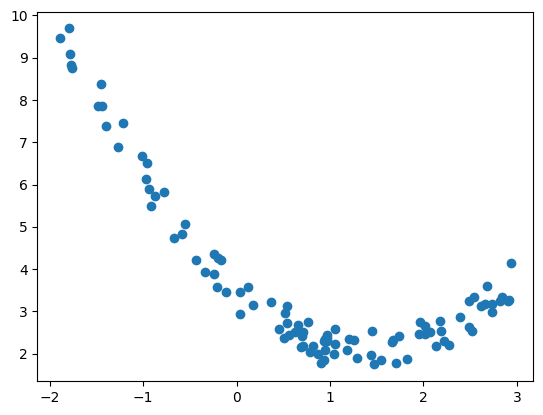

In [12]:
m=100
x1=5*np.random.rand(m, 1) - 2
x2=0.7*x1**2 - 2*x1 + 3 + np.random.rand(m,1)

plt.scatter(x1, x2)
plt.show()

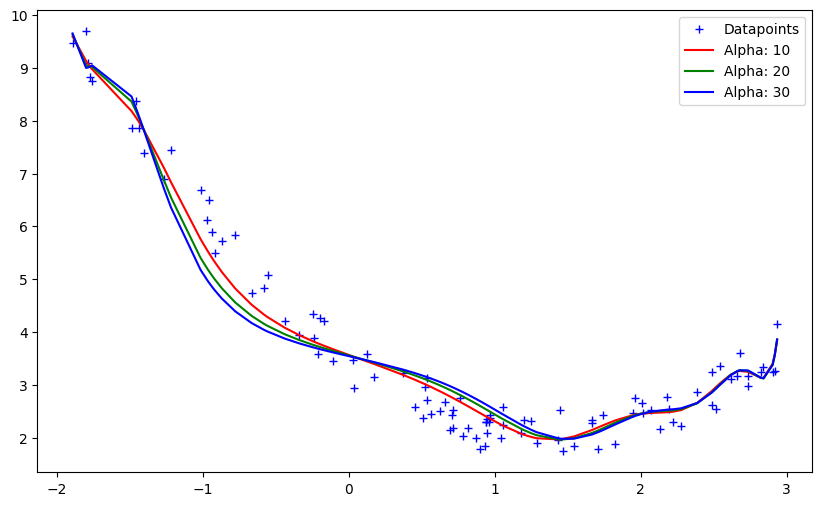

In [14]:
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [10, 20, 30]
cs = ['r','g', 'b']
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)    
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))
    
plt.legend()
plt.show()